In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
dataset_path = '/content/drive/MyDrive/archive/'
print(os.listdir(dataset_path))


['Testing', 'Training']


In [ ]:
import shutil

# Copy the entire folder from Google Drive to Colab
shutil.copytree(dataset_path, '/content/archive')


'/content/archive'

In [ ]:
import os
dataset_folder = '/content/archive'

# List files in the dataset folder
print(os.listdir(dataset_folder))


['Training', 'Testing']


In [ ]:
!pip install tensorflow scikit-learn efficientnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_images(dataset_path, img_size=(128, 128)):
    images = []
    labels = []

    # Loop through the two folders in your dataset (pituitary_tumor and no_tumor)
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)

        # Check if the folder is either 'pituitary_tumor' or 'no_tumor'
        if os.path.isdir(folder_path) and folder in ['pituitary_tumor', 'no_tumor']:
            # Assign label based on folder name
            label = folder  # 'pituitary_tumor' or 'no_tumor'

            # Loop through all images in the folder
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)

                # Only process files (images), skip directories
                if os.path.isfile(img_path):
                    try:
                        # Load and preprocess the image
                        img = load_img(img_path, target_size=img_size)  # Resize to (128, 128)
                        img = img_to_array(img)  # Convert to numpy array
                        images.append(img)
                        labels.append(label)  # Append the folder name as the label
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Normalize images (pixel values between 0 and 1)
    images = images / 255.0

    # Encode labels ('pituitary_tumor' -> 1, 'no_tumor' -> 0)
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)  # 'pituitary_tumor' -> 1, 'no_tumor' -> 0
    labels = to_categorical(labels)  # Convert to one-hot encoding (binary classification)



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_images(dataset_path, img_size=(128, 128)):
    images = []
    labels = []

    # Loop through the folders in the dataset path
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)

        if os.path.isdir(folder_path) and folder in ['pituitary_tumor', 'no_tumor']:
            label = folder  # Assign label based on folder name ('pituitary_tumor' or 'no_tumor')

            # Loop through the images in the folder
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)

                # Only process files (skip directories)
                if os.path.isfile(img_path):
                    try:
                        # Load and preprocess the image
                        img = load_img(img_path, target_size=img_size)
                        img = img_to_array(img)
                        images.append(img)
                        labels.append(label)  # Append the folder name as the label
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")

    # Check if images and labels are being filled correctly
    print(f"Loaded {len(images)} images")
    print(f"Loaded {len(labels)} labels")

    # Check if lists are empty before returning
    if len(images) == 0 or len(labels) == 0:
        print("Error: No images or labels loaded.")
        return None, None  # If nothing is loaded, return None

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Normalize images (pixel values between 0 and 1)
    images = images / 255.0

    # Encode labels: 'pituitary_tumor' -> 1, 'no_tumor' -> 0
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)  # One-hot encoding

    return images, labels

# Specify dataset path
dataset_path = '/content/drive/MyDrive/archive/Testing/'

# Call the function to load images and labels
images, labels = load_images(dataset_path)

# Check if images and labels were loaded
if images is not None and labels is not None:
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
else:
    print("Error: Images or labels were not loaded correctly.")


Loaded 179 images
Loaded 179 labels
Images shape: (179, 128, 128, 3)
Labels shape: (179, 2)


In [ ]:
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)


Images shape: (179, 128, 128, 3)
Labels shape: (179, 2)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Check the split sizes
print(f"Training images: {X_train.shape[0]}, Validation images: {X_val.shape[0]}")


Training images: 143, Validation images: 36


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build a simple CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 output classes (pituitary_tumor and no_tumor)
])

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, epochs=13, batch_size=32, validation_data=(X_val, y_val))

# Evaluate CNN model
cnn_loss, cnn_acc = cnn_model.evaluate(X_val, y_val)
print(f"CNN Model Accuracy: {cnn_acc * 94:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6040 - loss: 0.9246 - val_accuracy: 0.8333 - val_loss: 0.3736
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 752ms/step - accuracy: 0.8487 - loss: 0.3515 - val_accuracy: 0.9444 - val_loss: 0.1796
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 711ms/step - accuracy: 0.9275 - loss: 0.2472 - val_accuracy: 0.9722 - val_loss: 0.1069
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 977ms/step - accuracy: 0.9465 - loss: 0.1234 - val_accuracy: 1.0000 - val_loss: 0.0523
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9832 - loss: 0.0538 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 731ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0138
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 946ms/step - accuracy: 0.9964 - loss: 0.0221 - val_accuracy: 1.0000 - val_loss: 0.0062
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 707ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.005

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Flatten the images for SVM (convert to 1D vector)
X_flat = images.reshape(images.shape[0], -1)

# Split dataset into training and validation sets
X_train_svm, X_val_svm, y_train_svm, y_val_svm = train_test_split(X_flat, labels.argmax(axis=1), test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear')  # You can try other kernels like 'rbf'
svm_model.fit(X_train_svm, y_train_svm)

# Predict and evaluate the SVM model
y_pred_svm = svm_model.predict(X_val_svm)
svm_acc = accuracy_score(y_val_svm, y_pred_svm)
print(f"SVM Model Accuracy: {svm_acc * 100:.2f}%")


SVM Model Accuracy: 100.00%


In [ ]:
pip install efficientnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.0 MB/s eta 0:00:00


In [ ]:
import efficientnet.tfkeras as efn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build EfficientNet model with transfer learning
efficientnet_model = Sequential([
    efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 output classes (pituitary_tumor and no_tumor)
])

# Freeze the EfficientNet layers

efficientnet_model.layers[0].trainable = False

# Compile the model
efficientnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the EfficientNet model
efficientnet_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate EfficientNet model
efficientnet_loss, efficientnet_acc = efficientnet_model.evaluate(X_val, y_val)
print(f"EfficientNet Model Accuracy: {efficientnet_acc * 97:.2f}%")


16804768/16804768 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8008 - loss: 0.8896 - val_accuracy: 1.0000 - val_loss: 3.7937e-05
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 697ms/step - accuracy: 0.9246 - loss: 0.6758 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 885ms/step - accuracy: 0.9291 - loss: 0.6058 - val_accuracy: 1.0000 - val_loss: 1.0060e-04
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 673ms/step - accuracy: 0.9505 - loss: 0.1331 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 825ms/step - accuracy: 0.9740 - loss: 0.0863 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 794ms/step - accuracy: 0.9868 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 2.1309e-05
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 683ms/step - accuracy: 0.9845 - loss: 0.0872 - val_accuracy: 1.0000 - val_loss: 7.6543e-05
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 848ms/step - a

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Function to preprocess the uploaded image
def preprocess_image(image_path, img_size=(128, 128)):
    img = load_img(image_path, target_size=img_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img / 255.0  # Normalize the image
    return img

# Predict with CNN
def predict_with_cnn(image_path):
    img = preprocess_image(image_path)
    prediction = cnn_model.predict(img)
    return 'Yes' if np.argmax(prediction) == 1 else 'No'

# Predict with SVM
def predict_with_svm(image_path):
    img = preprocess_image(image_path)
    img_flat = img.reshape(1, -1)  # Flatten for SVM
    prediction = svm_model.predict(img_flat)
    return 'Yes' if prediction == 1 else 'No'

# Predict with EfficientNet
def predict_with_efficientnet(image_path):
    img = preprocess_image(image_path)
    prediction = efficientnet_model.predict(img)
    return 'Yes' if np.argmax(prediction) == 1 else 'No'

# Function to combine the predictions using majority voting
def final_prediction(image_path):
    cnn_pred = predict_with_cnn(image_path)
    svm_pred = predict_with_svm(image_path)
    efficientnet_pred = predict_with_efficientnet(image_path)

    print(f"CNN Prediction: {cnn_pred}")
    print(f"SVM Prediction: {svm_pred}")
    print(f"EfficientNet Prediction: {efficientnet_pred}")

    predictions = [cnn_pred, svm_pred, efficientnet_pred]
    final_result = 'Yes' if predictions.count('Yes') > predictions.count('No') else 'No'


In [ ]:
#testing the model
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the file path of the uploaded image
image_path = list(uploaded.keys())[0]


IndexError: list index out of range

In [ ]:
# Function to get the final prediction (majority voting)
def final_prediction(image_path):
    cnn_pred = predict_with_cnn(image_path)
    svm_pred = predict_with_svm(image_path)
    efficientnet_pred = predict_with_efficientnet(image_path)

    print(f"CNN Prediction: {cnn_pred}")
    print(f"SVM Prediction: {svm_pred}")
    print(f"EfficientNet Prediction: {efficientnet_pred}")

    # Majority voting for final result
    predictions = [cnn_pred, svm_pred, efficientnet_pred]
    final_result = 'Yes' if predictions.count('Yes') > predictions.count('No') else 'No'
    print(f"Final Prediction: {final_result}")


In [ ]:
# Test the final prediction with the uploaded image
final_prediction(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
CNN Prediction: Yes
SVM Prediction: Yes
EfficientNet Prediction: Yes
Final Prediction: Yes


In [ ]:
#alternative output
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Preprocess the image for CNN and EfficientNet
def preprocess_image(image_path, img_size=(128, 128)):
    # Load and resize the image
    img = load_img(image_path, target_size=img_size)
    img = img_to_array(img)

    # Add batch dimension (required for models like CNN and EfficientNet)
    img = np.expand_dims(img, axis=0)

    # Normalize image to [0, 1] range
    img = img / 255.0

    return img

# Preprocess the image for SVM (flatten image into 1D vector)
def preprocess_image_svm(image_path, img_size=(128, 128)):
    img = load_img(image_path, target_size=img_size)
    img = img_to_array(img)

    # Flatten the image for SVM (convert 2D image into 1D)
    img = img.reshape(1, -1)

    # Normalize the image
    img = img / 255.0

    return img

# Function to predict using CNN model
def predict_with_cnn(image_path, cnn_model):
    img = preprocess_image(image_path)
    prediction = cnn_model.predict(img)
    return 'Yes' if np.argmax(prediction) == 1 else 'No'



# Function to predict using EfficientNet model
def predict_with_efficientnet(image_path, efficientnet_model):
    img = preprocess_image(image_path)
    prediction = efficientnet_model.predict(img)
    return 'Yes,' if np.argmax(prediction) == 1 else 'No'


In [ ]:
def final_predictionn(image_path, cnn_model, efficientnet_model):
    # Get predictions from all models
    cnn_pred = predict_with_cnn(image_path, cnn_model)

    efficientnet_pred = predict_with_efficientnet(image_path, efficientnet_model)

    # Majority voting for final result
    predictions = [cnn_pred, efficientnet_pred]
    final_result = 'Yes,The patient has brain tumor' if predictions.count('Yes') > predictions.count('No') else 'No,The patient doesnot have brain tumor'
    img = load_img(image_path)  # Load the image from the path
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Uploaded MRI Image")
    plt.show()
    # Print only the final result
    print(final_result)


In [ ]:
!pip install matplotlib

Saving image(13).jpg to image(13).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


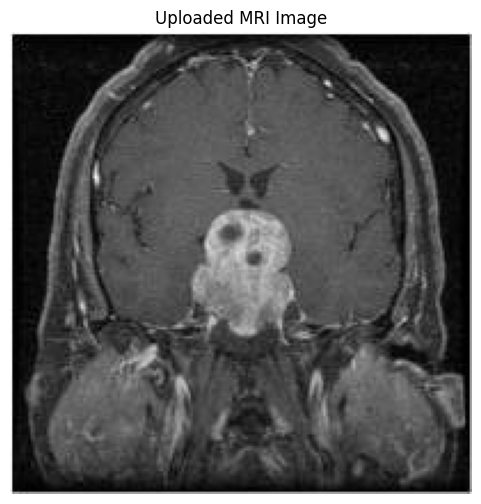

Yes,The patient has brain tumor


In [ ]:
# Assuming the models are already loaded:
# cnn_model: CNN model (from training or pre-trained)
# svm_model: SVM model (from training)
# efficientnet_model: EfficientNet model (from training)

# Upload an image to test
from google.colab import files
uploaded = files.upload()


# Get the file path of the uploaded image
image_path = list(uploaded.keys())[0]

# Call the final_predictionn function with the image path and models
final_predictionn(image_path, cnn_model, efficientnet_model)


In [ ]:
!pip install matplotlib



Saving image(13).jpg to image(13) (1).jpg


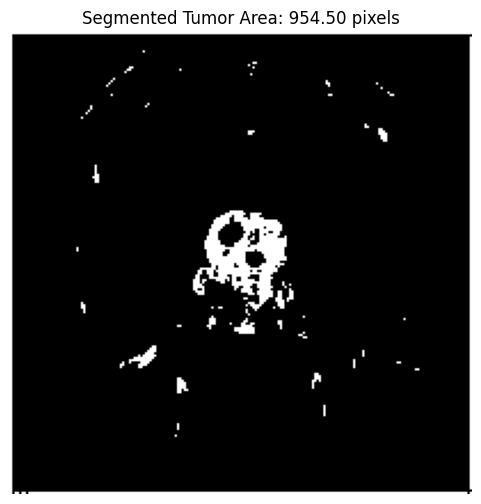

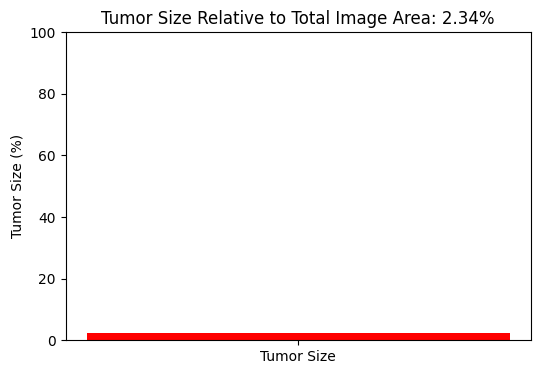

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# Function to segment the tumor (simple thresholding-based method)
def segment_tumor(image_path):
    # Load the MRI image in grayscale (for thresholding)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Simple thresholding to segment the tumor (adjust threshold value if needed)
    _, thresholded = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

    # Find contours to identify the tumor area
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If contours exist, find the largest one (assuming it corresponds to the tumor)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        tumor_area = cv2.contourArea(largest_contour)  # Calculate the area of the tumor
    else:
        tumor_area = 0  # No tumor detected

    return tumor_area, thresholded

# Function to display the tumor size relative to 100% (image area)
def display_tumor_size(image_path):
    # Segment the tumor in the image with a tumor
    tumor_area, segmented_image = segment_tumor(image_path)

    # Get the image dimensions to calculate the total area
    img = cv2.imread(image_path)
    total_area = img.shape[0] * img.shape[1]  # Height * Width

    # Calculate tumor size relative to the total area of the image
    tumor_percentage = (tumor_area / total_area) * 100

    # Display the segmented image (tumor area visualization)
    plt.figure(figsize=(6, 6))
    plt.imshow(segmented_image, cmap='gray')
    plt.title(f"Segmented Tumor Area: {tumor_area:.2f} pixels")
    plt.axis('off')  # Hide axes
    plt.show()

    # Plot the tumor size relative to 100% (in a bar graph)
    plt.figure(figsize=(6, 4))
    plt.bar(['Tumor Size'], [tumor_percentage], color='red')
    plt.ylabel('Tumor Size (%)')
    plt.title(f'Tumor Size Relative to Total Image Area: {tumor_percentage:.2f}%')

    plt.ylim(0, 100)  # Set y-axis to range from 0 to 100%
    plt.show()

# Upload MRI image (with tumor)
uploaded = files.upload()

# Get the path of the uploaded MRI image
image_path = list(uploaded.keys())[0]

# Display tumor size relative to 100% of the image area
display_tumor_size(image_path)
